In [62]:
import numpy as np
from cs771 import genSyntheticData as gsd
from cs771 import plotData as pd
from matplotlib import pyplot as plt
import time as tm
import numpy as np
import random
Z = np.loadtxt( "data" )


def randsplit(ratio,Z):
    np.random.shuffle(Z)
    y = Z[:,0]
    X = Z[:,1:]
    X_train = X[:int(ratio*(X.shape[0])),:]
    y_train = y[:int(ratio*(X.shape[0]))]
    X_validate = X[int(ratio*(X.shape[0])):,:]
    y_validate = y[int(ratio*(X.shape[0])):]
    return X_train,X_validate,y_train,y_validate
  

def CDGradient(w,y,X,C,j):
    Discriminant = 1 - np.multiply( (X.dot( w )), y )
    return (w[j] - 2*C*(np.sum(np.maximum(Discriminant,0)*y*X[:,j])))



In [65]:
w = np.zeros(X.shape[1]+1)
eta = .003
C = 1
(X,_,y,_) = randsplit(1,Z)
(n,) = y.shape
X = np.hstack((X, np.ones((n, 1))))
d=20

0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
12500
13000
13500
14000
14500
15000
15500
16000
16500
17000
17500
18000
18500
19000
19500
20000
20500
21000
21500
22000
22500
23000
23500
24000
24500
25000
25500
26000
26500
27000
27500
28000
28500
29000
29500
30000
30500
31000
31500
32000
32500
33000
33500
34000
34500
35000
35500
36000
36500
37000
37500
38000
38500
39000
39500
40000
40500
41000
41500
42000
42500
43000
43500
44000
44500
45000
45500
46000
46500
47000
47500
48000
48500
49000
49500
[2.19703800e-03 4.16144000e-03 6.43797600e-03 ... 7.89200300e+01
 7.89215240e+01 7.89229825e+01]


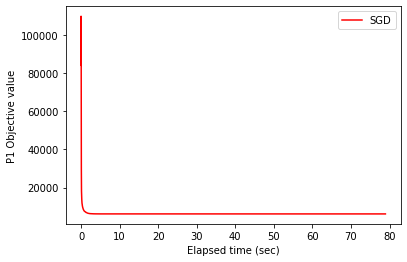

6245.129684622422
6245.129684622422


In [67]:
def getStepLength( grad, t , power = 0.5):
     return eta/np.sqrt(t+1)#pow(t+1, power)


def hingelossSq(theta):
    w = theta
#     b = theta[-1]
#     print("Nai")
    hingesq = np.square(np.maximum(1-np.multiply((X.dot(w)), y), 0))
    return np.sum(hingesq)

def ObjVal( theta ):
    w = theta[0:-1]
    b = theta[-1]
    Loss = hingelossSq(theta)
    return 0.5 * w.dot( w ) + C * Loss

def getCyclicCoord( currentCoord ):
    if currentCoord >= n-1 or currentCoord < 0:
        return 0
    else:
        return currentCoord + 1

def getRandCoord( currentCoord ):
    return random.randint( 0, d-1 )

def getRandpermCoord( currentCoord ):
    global randperm, randpermInner
    if randpermInner >= n-1 or randpermInner < 0 or currentCoord < 0:
        randpermInner = 0
        randperm = np.random.permutation( y.size )
        return randperm[randpermInner]
    else:
        randpermInner = randpermInner + 1
        return randperm[randpermInner]

def Coorinate_descent( gradFunc, CoordFunc, stepFunc, init, w, horizon = 10):
    objValSeries = np.zeros( (horizon,) )
    timeSeries = np.zeros( (horizon,) )
    totTime = 0
    cumulative = init
    w=init
    j=-1
    for t in range( horizon ):
        tic = tm.perf_counter()
        j = CoordFunc( j )
        delta = CDGradient(w,y,X,C,j)
        w[j] = w[j] - stepFunc(delta,t+1)*delta        
#         temp = alpha[i]*y[i]*X[i]
#         alpha[i] = alpha[i] + stepFunc( delta, t+1 ) * delta
#         if(alpha[i] < 0):
#             alpha[i] = 0
#         w = w - temp + alpha[i]*y[i]*X[i]
        toc = tm.perf_counter()
        totTime = totTime + (toc - tic)
        objValSeries[t] = ObjVal(w)
        timeSeries[t] = totTime
        if(t % 500 == 0):
            print(t)
        
    print(timeSeries)
    return (w, objValSeries, timeSeries)
  
def CDP1():
  
  (theta_SGD, obj_SGD, time_SGD) = Coorinate_descent( CDGradient, getRandCoord, getStepLength, np.random.random_sample( (d+1,) ), w, horizon = 50000)
  plt.figure()
  plt.plot( time_SGD, obj_SGD, color = 'r', linestyle = '-', label = "SGD" )
  plt.xlabel( "Elapsed time (sec)" )
  plt.ylabel( "P1 Objective value" )
  plt.legend()
  plt.show()
  print(min(obj_SGD))
  print(ObjVal(theta_SGD))
#   print(theta_SGD)
  
CDP1()
    